In [ ]:
import pandas as pd
try:
    data = pd.read_csv('/content/MARJANTA_DATA_CW3.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    data = pd.read_csv('/content/MARJANTA_DATA_CW3.csv', encoding='latin1')


In [ ]:
data.head(5)

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


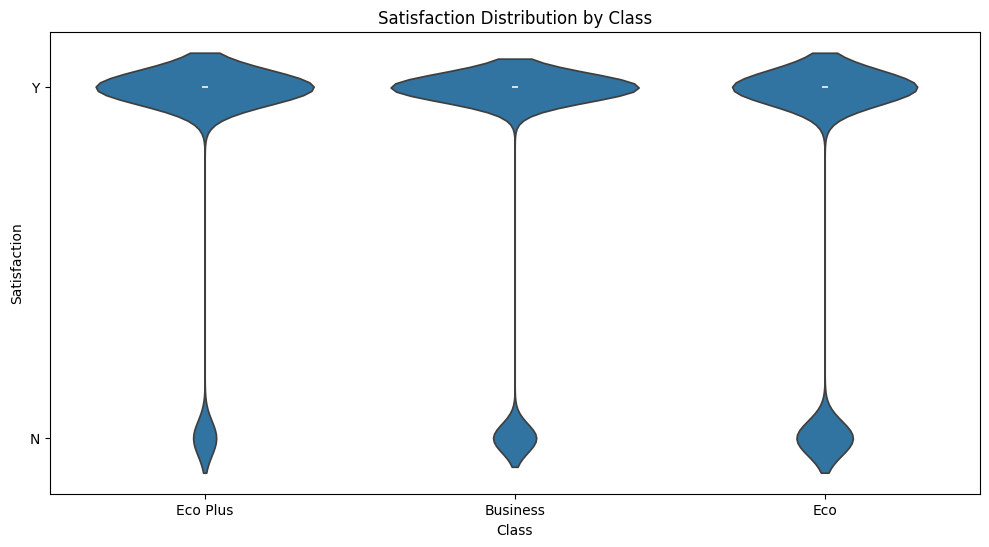

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Class', y='Satisfied', data=data)
plt.title('Satisfaction Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Satisfaction')
plt.show()

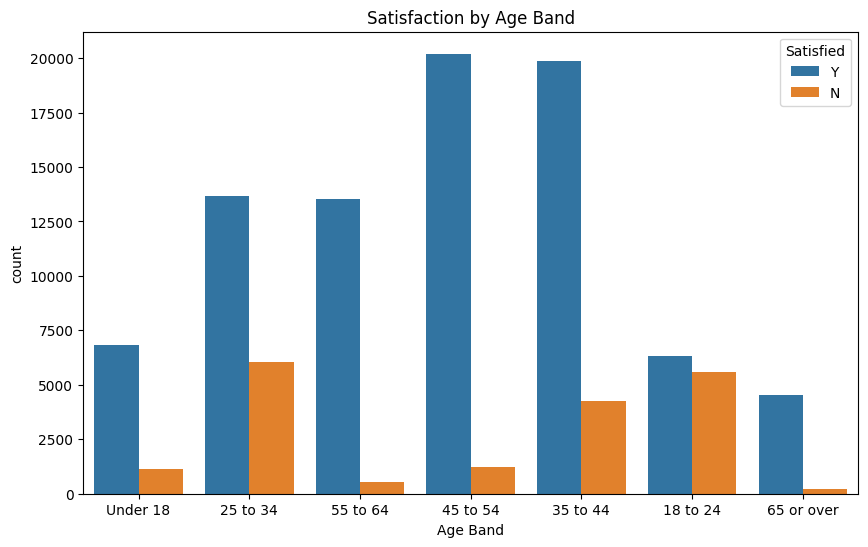

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Band', hue='Satisfied', data=data)
plt.title('Satisfaction by Age Band')
plt.show()

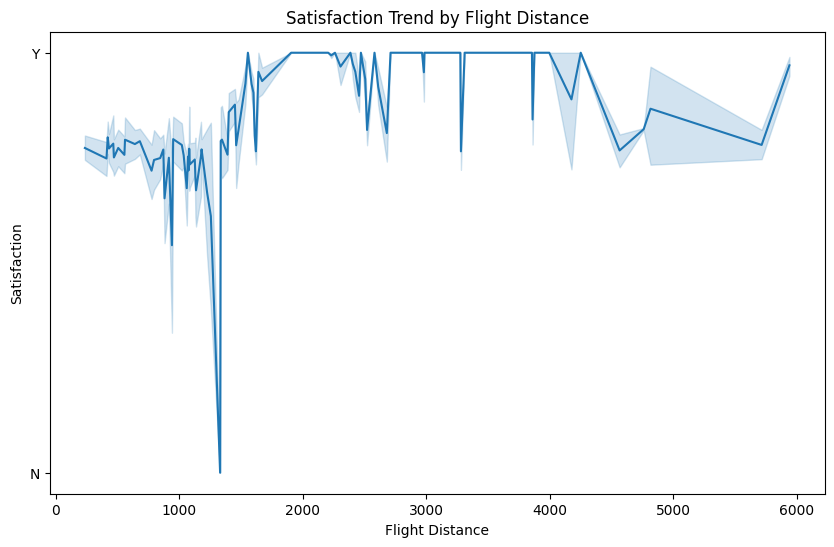

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Flight Distance', y='Satisfied', data=data)
plt.title('Satisfaction Trend by Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.show()

<ipython-input-22-354ba8f020aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Age", palette="husl", data=data, ax=ax[0])


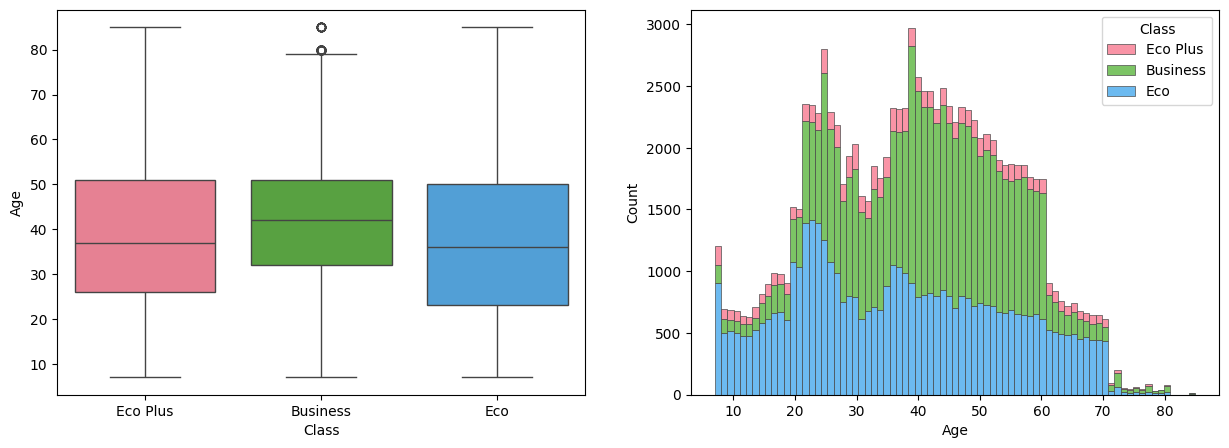

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x="Class", y="Age", palette="husl", data=data, ax=ax[0])
sns.histplot(data, x="Age", hue="Class", multiple="stack", palette="husl", edgecolor=".3", linewidth=.5, ax=ax[1])
plt.show()


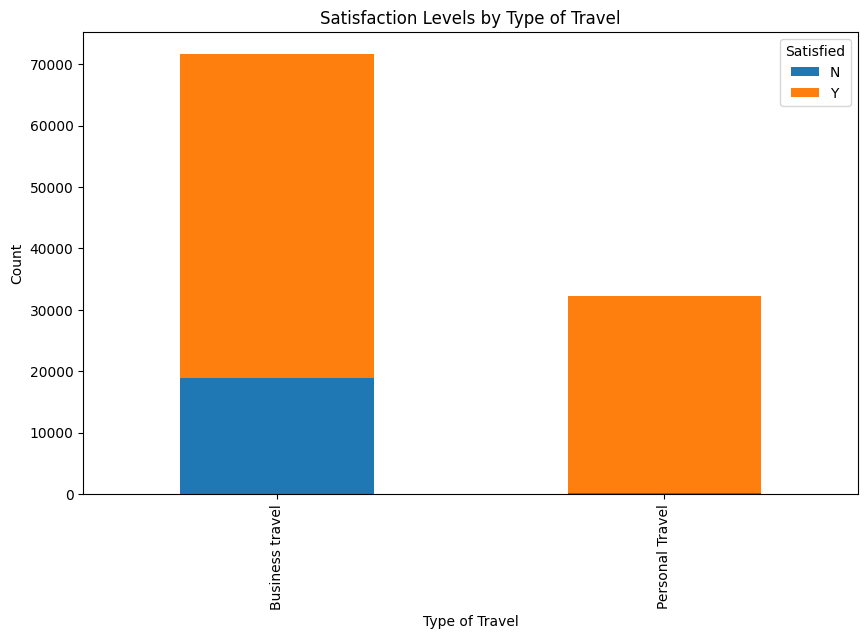

In [ ]:
travel_satisfaction = data.groupby(['Type of Travel', 'Satisfied']).size().unstack().fillna(0)
travel_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Satisfaction Levels by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()

<ipython-input-24-18f26d71adef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Age', data=data, palette='viridis')


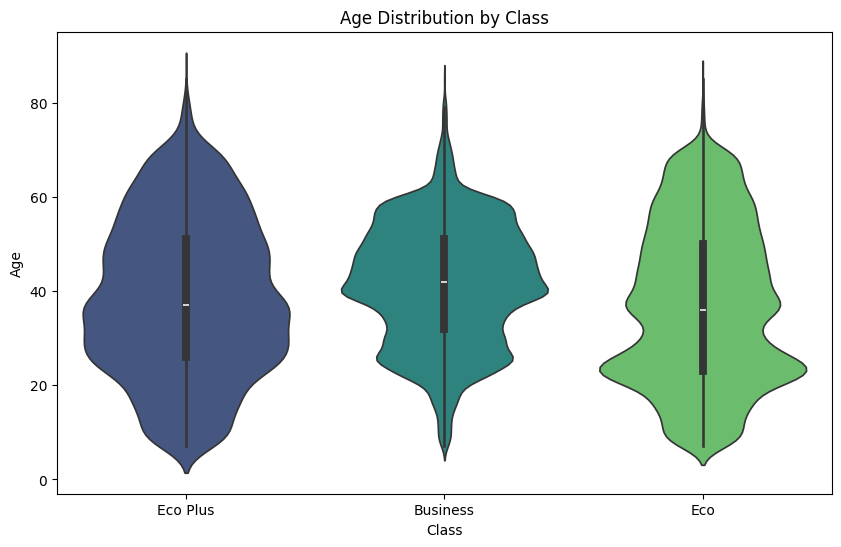

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Age', data=data, palette='viridis')
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


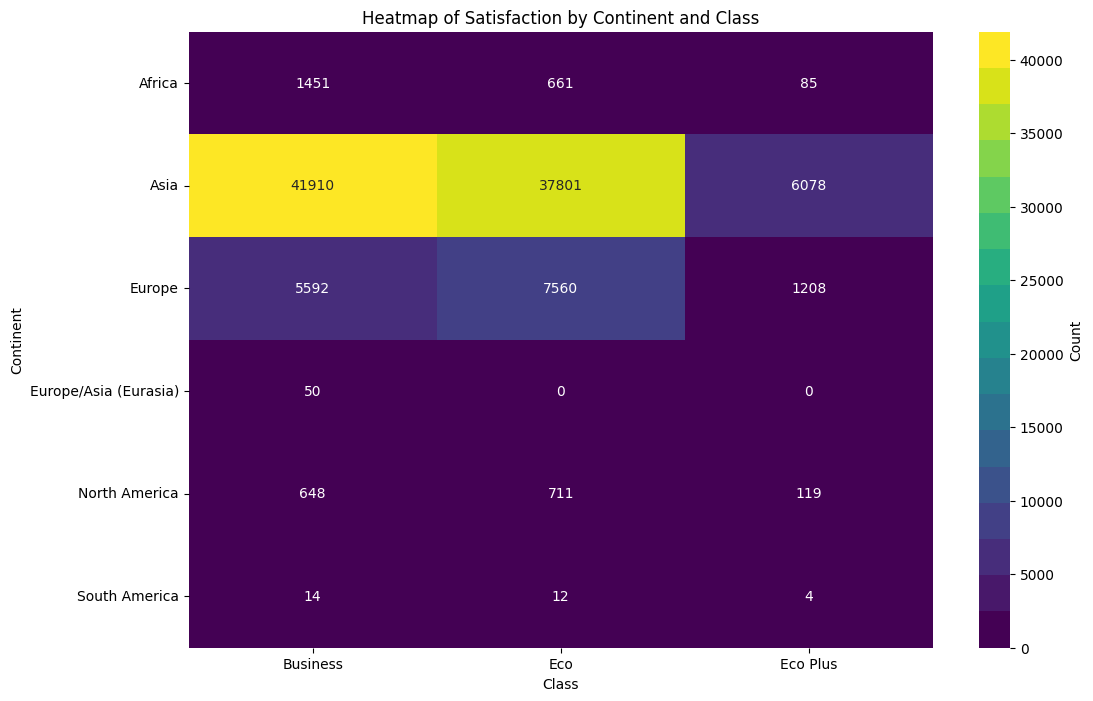

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
heatmap_data = data.pivot_table(index='Continent', columns='Class', values='Satisfied', aggfunc='count', fill_value=0)
unique_values = np.unique(heatmap_data.values)
num_colors = len(unique_values)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))
cmap = ListedColormap(colors)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap=cmap, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Satisfaction by Continent and Class')
plt.xlabel('Class')
plt.ylabel('Continent')
plt.show()


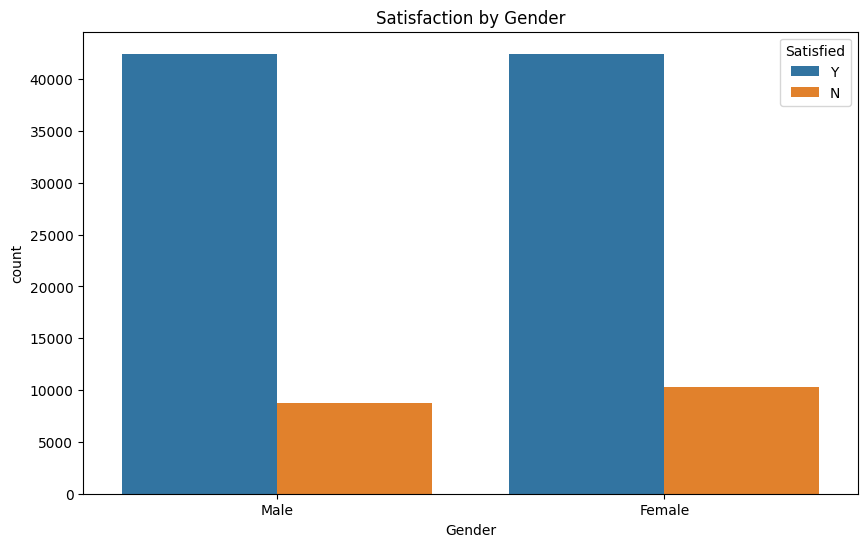

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Satisfied', data=data)
plt.title('Satisfaction by Gender')
plt.show()

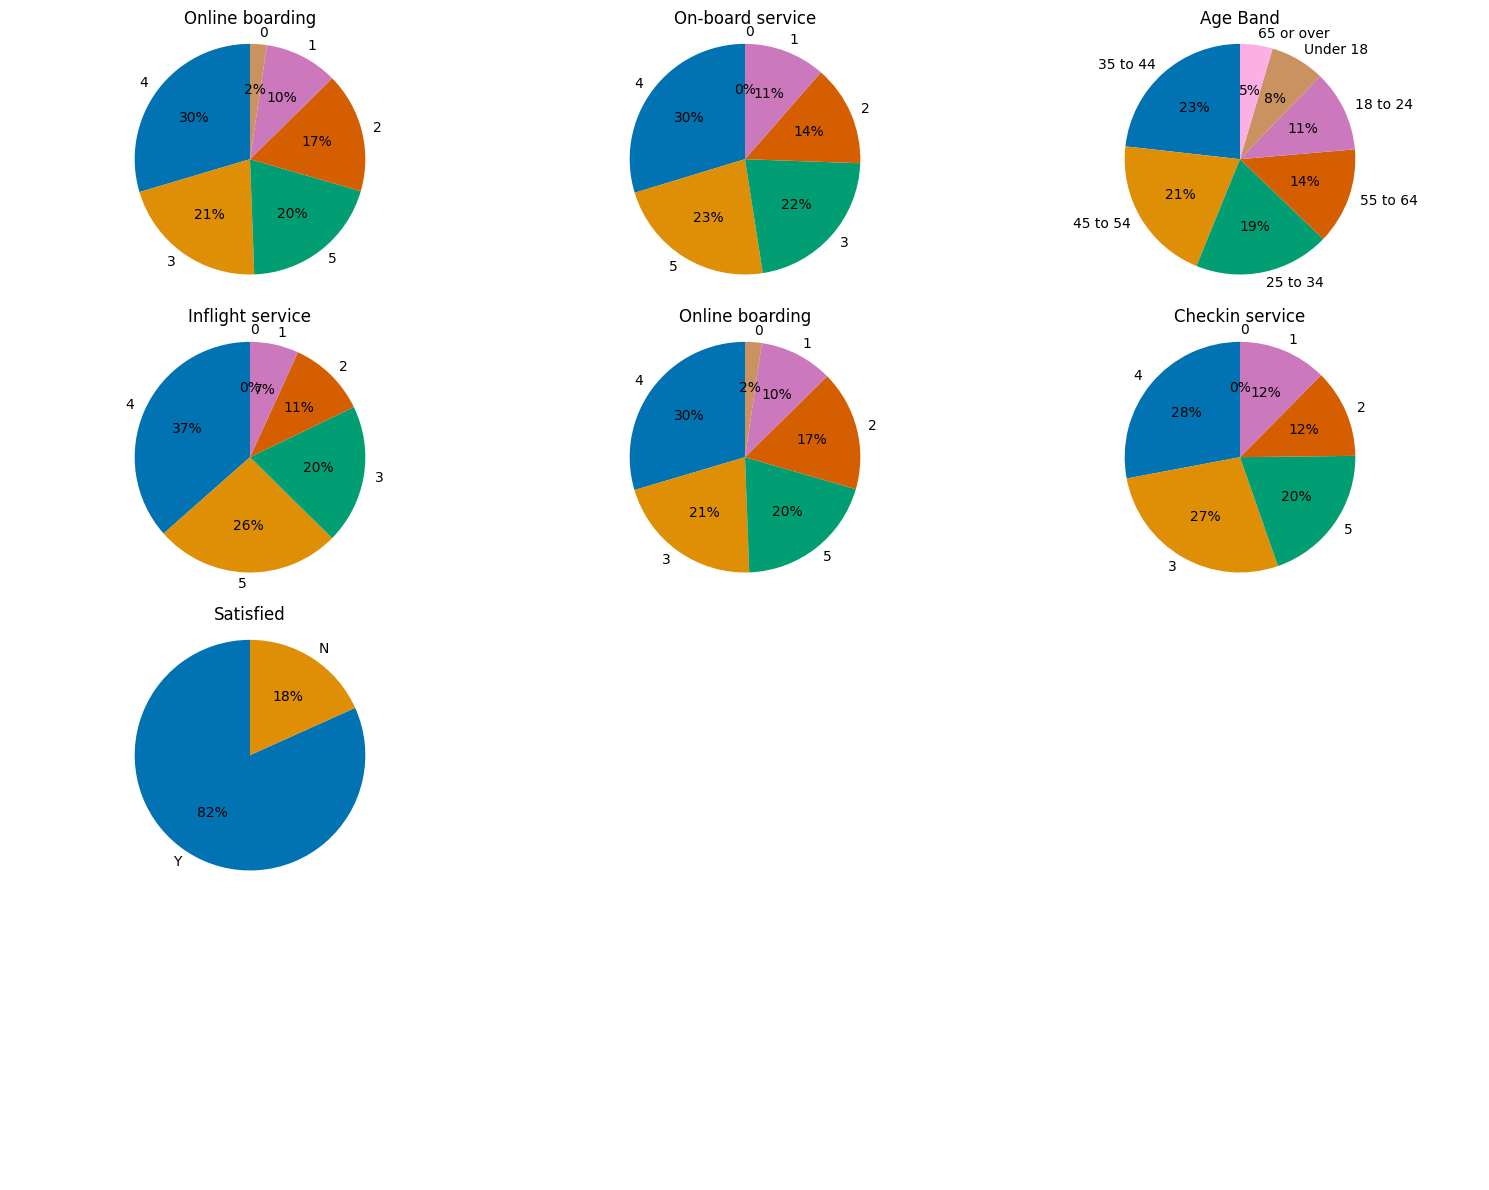

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_indexes = [16,19,5,23,16,22,3]  # Example indices; modify according to your dataset
categ = data.iloc[:, categorical_indexes]


# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a color palette
palette_name = "colorblind"

# Plot pie charts for each categorical column
for i, col in enumerate(categ.columns):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i].pie(
        sizes,
        labels=labels,
        colors=sns.color_palette(palette_name, len(labels)),
        autopct='%1.0f%%',
        startangle=90
    )
    axes[i].axis('equal')
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

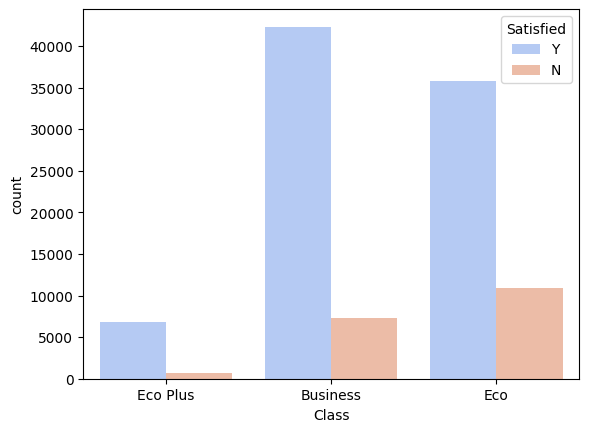

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.countplot(x='Class', hue='Satisfied', palette="coolwarm", data=data)

# Display the plot
plt.show()


**Handing** **Missing** **Values**

In [ ]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Arrival Delay in Minutes    310
dtype: int64


In [ ]:
mean_delay = data['Arrival Delay in Minutes'].mean()
data['Arrival Delay in Minutes'].fillna(mean_delay, inplace=True)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = [
    'Gender',
    'Satisfied',
    'Age Band',
    'Type of Travel',
    'Class',
    'Continent' ,
    'Destination'
]

# Convert categorical columns to numeric using Label Encoding
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,1,1,13,6,1,2,4760,31,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,1,0,25,1,0,0,235,67,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,0,1,26,1,0,0,4760,31,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,0,1,25,1,0,0,560,60,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,1,1,61,4,0,0,4760,31,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,0,23,0,0,1,4760,31,...,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,1,1,49,3,0,0,4760,31,...,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,1,0,30,1,0,0,4760,31,...,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,0,0,22,0,0,1,4760,31,...,1,1,4,5,1,5,4,1,0,0.0


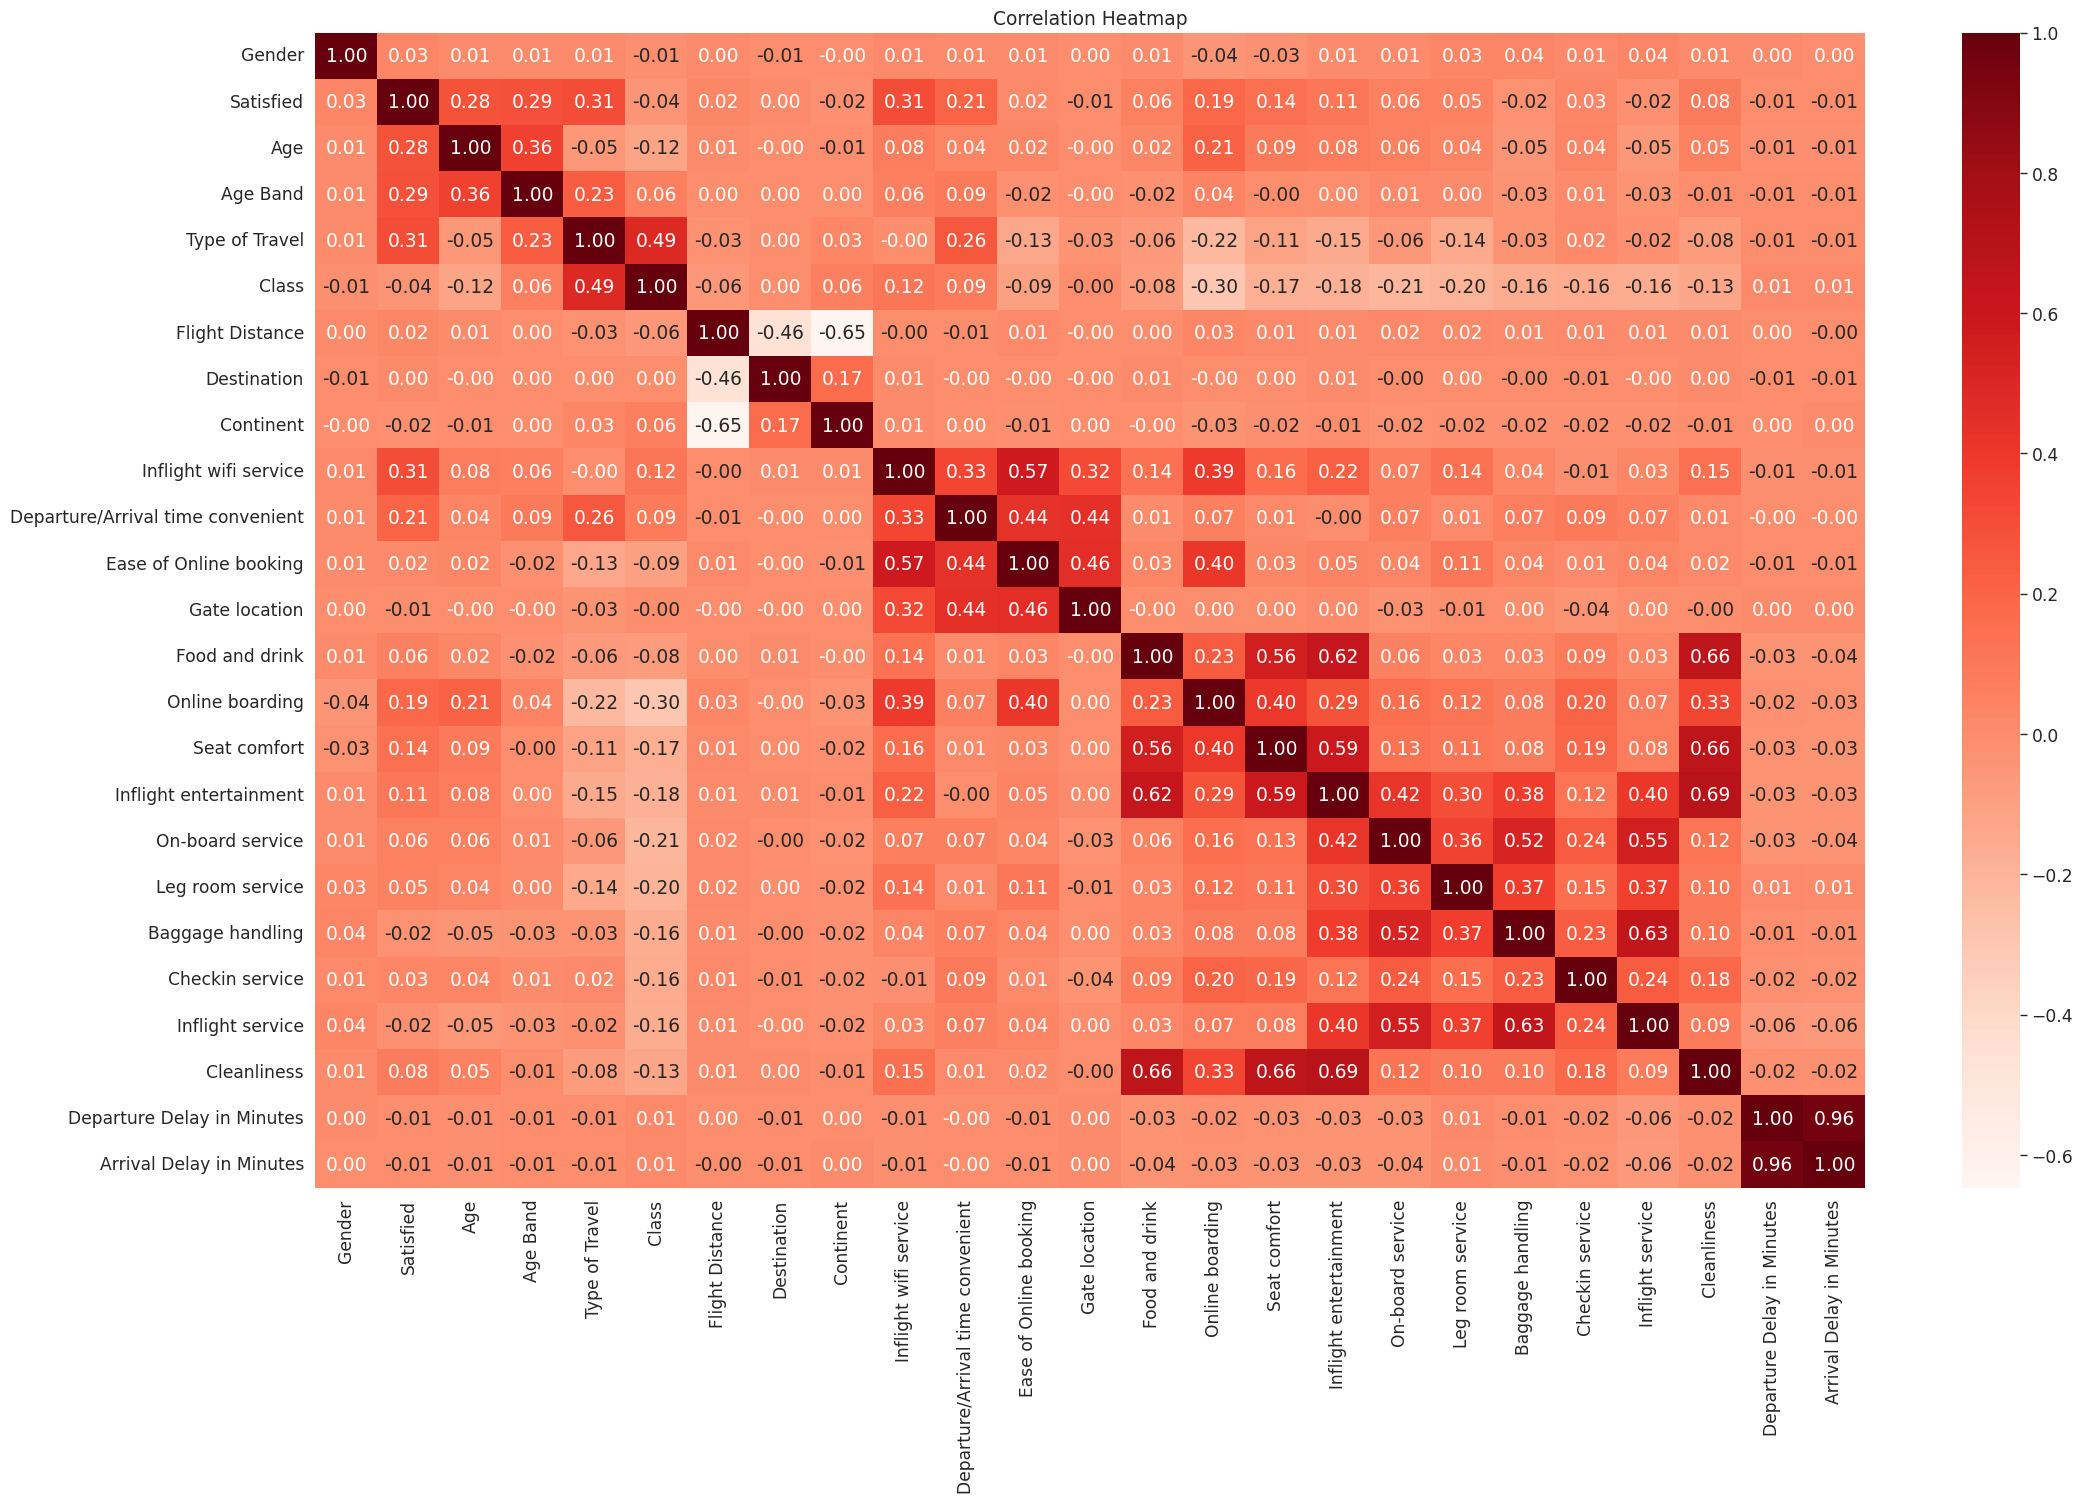

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(25, 15))
sns.set_context('paper', font_scale=1.4)

data = data.iloc[:, 2:]
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
crash_mx = numeric_data.corr()

# Plot the heatmap
sns.heatmap(crash_mx, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
